In [6]:
# Loading libraries
import zipfile
from PIL import Image
from PIL import ImageDraw
from PIL import ImageOps
import pytesseract
import cv2 as cv
import numpy as np
import math

# Loading face-detector XML classifier
face_classifier = cv.CascadeClassifier("readonly/haarcascade_frontalface_default.xml")

# Extracting the zipfile and getting images
images = []

zipImages = zipfile.ZipFile("readonly/images.zip","r")
for file in zipImages.infolist():
    img = Image.open(zipImages.open(file))
    #images.append(img)
    #images_path.append(file.filename)
    img.save(file.filename)
    images.append({'image':img, 'filename':file.filename})
    
# Searching terms
def searchTerms(img, term):
    ''' 
    This function search for specific text term in a image and return True if the term exists
    :params img: PIL Image object
    :params term: string
    '''
    output = pytesseract.image_to_string(img)
    if term.lower() in output.lower():
        return True
    else:
        return False

    
# This is working already! Continue with a function to detect faces!
#a = searchTerms(images[0],"Mark")
#print(a)

In [10]:
# Detecting faces
def detect_faces(path):
    '''
    This function loads an image, apply face classifier and return a array with box coordinates (x1, y1, x2, y2)
    :params: path: string with the file path of the image
    '''
    cv_image = cv.imread(path)
    cv_gray = cv.cvtColor(cv_image, cv.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(cv_gray, scaleFactor = 1.85, minNeighbors = 4)
    boxes = []
    for face in faces:
        boxes.append([face[0],face[1],face[0]+face[2],face[1]+face[3]])
    return boxes

#print(detect_faces(images[0]["filename"]))

def crop_image(img, boxes):
    '''
    This function crop an image based on x,y coordinates and return an array of cropped faces
    :param img: a PIL Image object
    :param boxes: an array of arrays containing (x1,y1,x2,y2) coordinates
    '''
    array_faces = []
    for box in boxes:
        array_faces.append(img.crop(box).resize((100,100)))
    
    return array_faces

#myboxes = detect_faces(images[3]["filename"])
#myfaces = crop_image(images[3]['image'], myboxes)

#for face in myfaces:
#    display(face)


In [11]:
def face_composite(cropped_faces):
    '''
    This function return a face composite image
    :param cropped_faces: an array of images
    '''
    face_sheet = Image.new('RGB',(500, math.ceil(len(cropped_faces)/5)*100))
    x = 0
    y = 0
    
    for face in cropped_faces:
        face_sheet.paste(face, (x,y))
        
        if x + face.width >= face_sheet.width:
            x = 0
            y = y + face.height
        else:
            x = x + face.width
        
    return face_sheet

#display(face_composite(myfaces))


Results found in file a-0.png


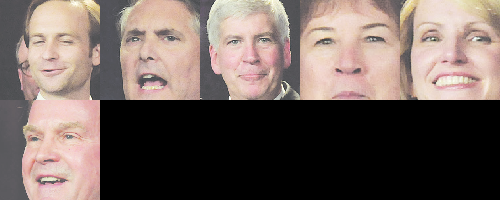

Results found in file a-1.png


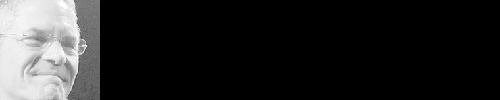

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png
But there were no faces in that file!
Results found in file a-2.png


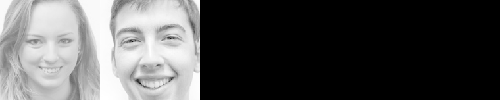

Results found in file a-3.png


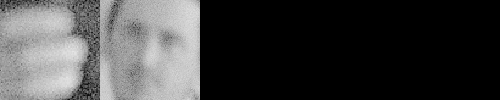

Results found in file a-5.png


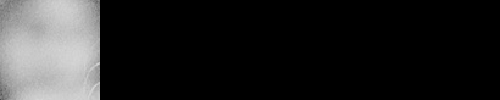

Results found in file a-8.png
But there were no faces in that file!
Results found in file a-9.png


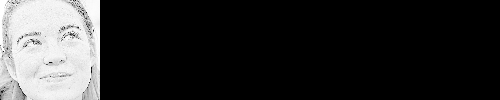

In [12]:
# Putting all together:

#print(images)

def find_person(name):
    for image in images:
        if searchTerms(image['image'], name):
            print("Results found in file {}".format(image['filename']))
            myboxes = detect_faces(image["filename"])
            if myboxes == []:
                print("But there were no faces in that file!")
            else:
                display(face_composite(crop_image(image['image'], myboxes)))
                
        
            
find_person("Mark")        